# Lab 1: Part B

In [139]:
#reading in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = "https://dlsun.github.io/pods/data/"
df_okcupid = pd.read_csv(data_dir + "okcupid.csv")

In the data, we can see that the observational unit is based on thier number, or the row names (i.e. 1, 2, 3...). It could also be their unique combination of essay answers becuase no two combinations of the 4 essays are the same. I am choosing to look at how education levels relates to religion to answer the following question: How do the education levels of the users relate to their other demographic/lifestyle information?. Most people I know, as in my friends in both my collges, have been non-religious and so I'm curious to see if non-religious people are more educated. For the sake of simplicity, I'm going to use Atheism as non-religious.

### Data Exploration

In [149]:
df_okcupid.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
speaks          object
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
height         float64
status          object
dtype: object

The variables I'm using are both categorical variables with multiple levels. Education has many different levels and are not conistent while religion starts with the individuals religious affiliation followed by a phrase indicating how serious they are about it. For the religion variable, I chose to disregard the add-ons to the religions such as "islam and very serious about it", or "other and laughing about it".

In [150]:
df_okcupid["religion"]=df_okcupid["religion"].str.split(" ",n=1, expand=True)
religions=pd.unique(df_okcupid.religion)
print("After this change, there are", len(religions),"different religions in this data set:\n", religions);

After this change, there are 10 different religions in this data set:
 ['buddhism' nan 'other' 'catholicism' 'atheism' 'christianity'
 'agnosticism' 'judaism' 'hinduism' 'islam']


<AxesSubplot:title={'center':'Religion Distribution'}, xlabel='Religions', ylabel='Counts'>

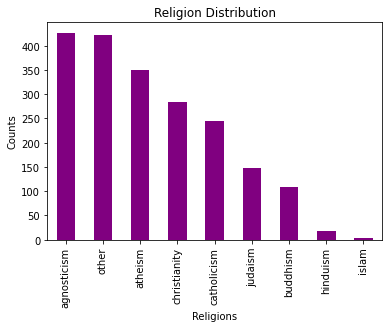

In [68]:
religion_counts=df_okcupid["religion"].value_counts()
religion_counts.plot.bar(color="purple", xlabel="Religions", ylabel="Counts", title="Religion Distribution for Entire Data Set")

### Variable Aggregation

Before aggregation, there are 31 different responses to education in this data set:
 ['graduated from college/university' 'working on college/university'
 'graduated from masters program' nan 'graduated from ph.d program'
 'graduated from high school' 'dropped out of college/university'
 'graduated from two-year college' 'graduated from med school'
 'working on space camp' 'working on two-year college'
 'graduated from space camp' 'dropped out of space camp'
 'working on ph.d program' 'graduated from law school'
 'college/university' 'high school' 'working on law school'
 'two-year college' 'working on masters program' 'masters program'
 'dropped out of high school' 'working on med school' 'space camp'
 'dropped out of masters program' 'ph.d program' 'working on high school'
 'dropped out of med school' 'dropped out of two-year college'
 'dropped out of law school' 'dropped out of ph.d program']


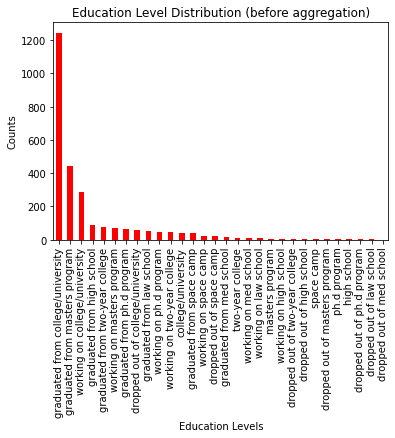

In [154]:
edu_complete_counts = df_okcupid["education"].value_counts();
edu_complete_counts.plot.bar(color="red", xlabel="Education Levels", ylabel="Counts", title="Education Level Distribution (before aggregation)")
edu=pd.unique(df_okcupid.education)
print("Before aggregation, there are", len(edu),"different responses to education in this data set:\n", edu);

After aggregation, there are only 4 categories:
 ['Bachelors' 'High School or Below' 'Advanced Degree' nan 'Other']


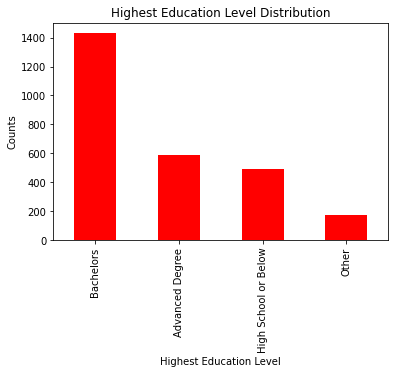

In [159]:
df_okcupid["highest_edu_level"] = df_okcupid["education"].map({
  'graduated from college/university':"Bachelors",
    'working on college/university':"High School or Below", 
    'graduated from masters program':"Advanced Degree",
    'graduated from ph.d program':"Advanced Degree", 
    'graduated from high school':"High School or Below",
    'dropped out of college/university':"High School or Below",
    'graduated from two-year college':"Other", 
    'graduated from med school':"Advanced Degree",
    'working on space camp':"Other", 
    'working on two-year college':"High School or Below",
    'graduated from space camp':"Other", 
    'dropped out of space camp':"Other",
    'working on ph.d program':"Bachelors", 
    'graduated from law school':"Advanced Degree",
    'college/university':"Bachelors", 
    'high school':"High School or Below", 
    'working on law school':"Bachelors",
    'two-year college':"Other", 
    'working on masters program':"Bachelors",
    'masters program':"Bachelors", 
    'dropped out of high school':"High School or Below",
    'working on med school':"Advanced Degree", 
    'space camp':"Other",
    'dropped out of masters program':"Bachelors", 
    'ph.d program':"Bachelors",
    'working on high school':"High School or Below", 
    'dropped out of med school':"Bachelors",
    'dropped out of two-year college':"High School or Below", 
    'dropped out of law school':"Bachelors",
    'dropped out of ph.d program':"Bachelors"  
});
edu_counts = df_okcupid["highest_edu_level"].value_counts();
edu_counts.plot.bar(color="red", xlabel="Highest Education Level", ylabel="Counts", title="Highest Education Level Distribution")
high_edu=pd.unique(df_okcupid.highest_edu_level)
print("After aggregation, there are only 4 categories:\n", high_edu)

After aggregating the education types into smaller categories, it is easier to see that the majority of people on OK Cupid have their bachelors degree. Below is a breakdown of the differnet education levels in the set by religious affiliations.

<AxesSubplot:xlabel='religion'>

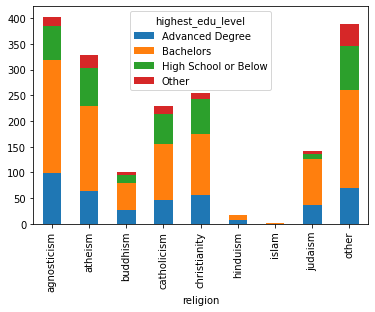

In [119]:
#religion and education
df_plot_edu_relig = df_okcupid.groupby(['religion', 'highest_edu_level']).size().reset_index().pivot(columns='highest_edu_level', index='religion', values=0)
df_plot_edu_relig.plot(kind='bar', stacked=True)

### Proportions of Athiest Education

percent of atheists with bachelors degree= 47.277936962750715 %
percent of atheists with advanced degrees= 18.33810888252149 %
percent of atheists with high school or below education= 20.916905444126073 %
percent of atheists with an other type of education= 7.4498567335243555 %


<AxesSubplot:title={'center':'Breakdown of Education Levels of Atheists'}, xlabel='Education Level', ylabel='Counts'>

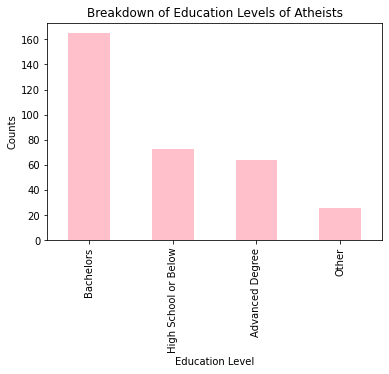

In [120]:
total_atheists=len(df_okcupid[(df_okcupid["religion"] == "atheism")])
athiests_bachelors=len(df_okcupid[(df_okcupid["religion"] == "atheism") & (df_okcupid["highest_edu_level"] == "Bachelors")])
athiests_advanced = len(df_okcupid[(df_okcupid["religion"] == "atheism") & (df_okcupid["highest_edu_level"] == "Advanced Degree")])
athiests_highschool = len(df_okcupid[(df_okcupid["religion"] == "atheism") & (df_okcupid["highest_edu_level"] == "High School or Below")])
athiests_other=len(df_okcupid[(df_okcupid["religion"] == "atheism") & (df_okcupid["highest_edu_level"] == "Other")])
print("percent of atheists with bachelors degree=",(athiests_bachelors/total_atheists)*100, "%")
print("percent of atheists with advanced degrees=",(athiests_advanced/total_atheists)*100, "%")
print("percent of atheists with high school or below education=",(athiests_highschool/total_atheists)*100, "%")
print("percent of atheists with an other type of education=",(athiests_other/total_atheists)*100, "%")
just_atheists=df_okcupid[(df_okcupid["religion"] == "atheism")]
atheist_counts = just_atheists["highest_edu_level"].value_counts()
atheist_counts.plot.bar(color="pink", xlabel="Education Level", ylabel="Counts", title="Breakdown of Education Levels of Atheists")




It's interesting that almost half (47%) of the atheists have bachelors degrees. This finding supports my original hypothesis. I also wanted to look into how popular atheism was per "high" education level (or the top two, bachelors-orange and advanced degrees-green) so I subset the OK cupid data frame to have only people with bachelors, then again for only advanced degrees.

<AxesSubplot:title={'center':"Breakdown of Bachelor's"}, xlabel='Religion', ylabel='Counts'>

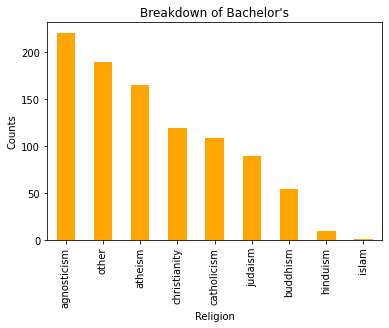

In [121]:
just_bachelors=df_okcupid[(df_okcupid["highest_edu_level"] == "Bachelors")]
bachelor_counts = just_bachelors["religion"].value_counts()
bachelor_counts.plot.bar(color="orange", xlabel="Religion", ylabel="Counts", title="Religious Breakdown of Bachelor's")

<AxesSubplot:title={'center':'Breakdown of Advanced Degrees'}, xlabel='Religion', ylabel='Counts'>

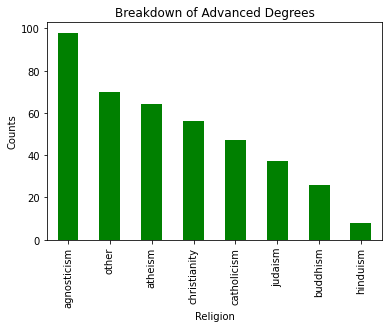

In [122]:
just_advanced=df_okcupid[(df_okcupid["highest_edu_level"] == "Advanced Degree")]
advanced_counts = just_advanced["religion"].value_counts()
advanced_counts.plot.bar(color="green", xlabel="Religion", ylabel="Counts", title="Religious Breakdown of Advanced Degrees")

Here, we can see that the third most common religious group with a bachelors degree is atheism. Overall, these show that while atheists may not be the most educated (agnosticism is the most common for both) since thier most common education level is bachelors and they come in third place for bachelors and Advanced Degrees, they are still relatively highly educated. They mainly have above high school degrees.